DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
# Data Importing

In [155]:
train_data=pd.read_csv('train.csv')
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [156]:
test_data=pd.read_csv('test.csv')
test_data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


## task_1 - If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [157]:
var=train_data.var().to_frame().reset_index().rename(columns={0:'variance','index':'features'})
var

,features,variance
0,ID,5.941936e+06
1,y,1.607667e+02
2,X10,1.313092e-02
3,X11,0.000000e+00
4,X12,6.945713e-02
...,...,...
365,X380,8.014579e-03
366,X382,7.546747e-03
367,X383,1.660732e-03
368,X384,4.750593e-04


In [158]:
var_zero = var[var.variance==0]
var_zero

,features,variance
3,X11,0.0
83,X93,0.0
97,X107,0.0
219,X233,0.0
221,X235,0.0
254,X268,0.0
275,X289,0.0
276,X290,0.0
279,X293,0.0
283,X297,0.0


In [159]:
features_to_remove=list(var_zero.features.values)
features_to_remove

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [160]:
train_data.drop(features_to_remove,axis=1,inplace=True)
test_data.drop(features_to_remove,axis=1,inplace=True)

In [161]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [162]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


## task_2 - Check for null and unique values for test and train sets.

In [163]:
train_data.isnull().sum().any()

False

In [164]:
test_data.isnull().sum().any()

False

In [165]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 366 entries, ID to X385
dtypes: float64(1), int64(357), object(8)
memory usage: 11.8+ MB


In [166]:
train_data.select_dtypes(include='object').columns.tolist()

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [167]:
train_data.X0.unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [168]:
train_data.X1.unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [169]:
train_data.X2.unique()

array(['at', 'av', 'n', 'e', 'as', 'aq', 'r', 'ai', 'ak', 'm', 'a', 'k',
       'ae', 's', 'f', 'd', 'ag', 'ay', 'ac', 'ap', 'g', 'i', 'aw', 'y',
       'b', 'ao', 'al', 'h', 'x', 'au', 't', 'an', 'z', 'ah', 'p', 'am',
       'j', 'q', 'af', 'l', 'aa', 'c', 'o', 'ar'], dtype=object)

In [170]:
train_data.X3.unique()

array(['a', 'e', 'c', 'f', 'd', 'b', 'g'], dtype=object)

In [171]:
train_data.X4.unique()

array(['d', 'b', 'c', 'a'], dtype=object)

In [172]:
train_data.X5.unique()

array(['u', 'y', 'x', 'h', 'g', 'f', 'j', 'i', 'd', 'c', 'af', 'ag', 'ab',
       'ac', 'ad', 'ae', 'ah', 'l', 'k', 'n', 'm', 'p', 'q', 's', 'r',
       'v', 'w', 'o', 'aa'], dtype=object)

In [173]:
train_data.X6.unique()

array(['j', 'l', 'd', 'h', 'i', 'a', 'g', 'c', 'k', 'e', 'f', 'b'],
      dtype=object)

In [174]:
train_data.X8.unique()

array(['o', 'x', 'e', 'n', 's', 'a', 'h', 'p', 'm', 'k', 'd', 'i', 'v',
       'j', 'b', 'q', 'w', 'g', 'y', 'l', 'f', 'u', 'r', 't', 'c'],
      dtype=object)

In [175]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 365 entries, ID to X385
dtypes: int64(357), object(8)
memory usage: 11.7+ MB


In [176]:
test_data.select_dtypes(include='object').columns.tolist()

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [177]:
test_data.X0.unique()

array(['az', 't', 'w', 'y', 'x', 'f', 'ap', 'o', 'ay', 'al', 'h', 'z',
       'aj', 'd', 'v', 'ak', 'ba', 'n', 'j', 's', 'af', 'ax', 'at', 'aq',
       'av', 'm', 'k', 'a', 'e', 'ai', 'i', 'ag', 'b', 'am', 'aw', 'as',
       'r', 'ao', 'u', 'l', 'c', 'ad', 'au', 'bc', 'g', 'an', 'ae', 'p',
       'bb'], dtype=object)

In [178]:
test_data.X1.unique()

array(['v', 'b', 'l', 's', 'aa', 'r', 'a', 'i', 'p', 'c', 'o', 'm', 'z',
       'e', 'h', 'w', 'g', 'k', 'y', 't', 'u', 'd', 'j', 'q', 'n', 'f',
       'ab'], dtype=object)

In [179]:
test_data.X2.unique()

array(['n', 'ai', 'as', 'ae', 's', 'b', 'e', 'ak', 'm', 'a', 'aq', 'ag',
       'r', 'k', 'aj', 'ay', 'ao', 'an', 'ac', 'af', 'ax', 'h', 'i', 'f',
       'ap', 'p', 'au', 't', 'z', 'y', 'aw', 'd', 'at', 'g', 'am', 'j',
       'x', 'ab', 'w', 'q', 'ah', 'ad', 'al', 'av', 'u'], dtype=object)

In [180]:
test_data.X3.unique()

array(['f', 'a', 'c', 'e', 'd', 'g', 'b'], dtype=object)

In [181]:
test_data.X4.unique()

array(['d', 'b', 'a', 'c'], dtype=object)

In [182]:
test_data.X5.unique()

array(['t', 'b', 'a', 'z', 'y', 'x', 'h', 'g', 'f', 'j', 'i', 'd', 'c',
       'af', 'ag', 'ab', 'ac', 'ad', 'ae', 'ah', 'l', 'k', 'n', 'm', 'p',
       'q', 's', 'r', 'v', 'w', 'o', 'aa'], dtype=object)

In [183]:
test_data.X6.unique()

array(['a', 'g', 'j', 'l', 'i', 'd', 'f', 'h', 'c', 'k', 'e', 'b'],
      dtype=object)

In [184]:
test_data.X8.unique()

array(['w', 'y', 'j', 'n', 'm', 's', 'a', 'v', 'r', 'o', 't', 'h', 'c',
       'k', 'p', 'u', 'd', 'g', 'b', 'q', 'e', 'l', 'f', 'i', 'x'],
      dtype=object)

## task_3 - Apply label encoder.

In [185]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [186]:
X0_key=np.union1d(train_data.X0.unique(),test_data.X0.unique())
X0_key

array(['a', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ai', 'aj', 'ak',
       'al', 'am', 'an', 'ao', 'ap', 'aq', 'as', 'at', 'au', 'av', 'aw',
       'ax', 'ay', 'az', 'b', 'ba', 'bb', 'bc', 'c', 'd', 'e', 'f', 'g',
       'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'x', 'y', 'z'], dtype=object)

In [187]:
X0_val=encoder.fit_transform(X0_key)
X0_val

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

In [188]:
X0_dic=dict(zip(X0_key,X0_val))
print(X0_dic)

{'a': 0, 'aa': 1, 'ab': 2, 'ac': 3, 'ad': 4, 'ae': 5, 'af': 6, 'ag': 7, 'ai': 8, 'aj': 9, 'ak': 10, 'al': 11, 'am': 12, 'an': 13, 'ao': 14, 'ap': 15, 'aq': 16, 'as': 17, 'at': 18, 'au': 19, 'av': 20, 'aw': 21, 'ax': 22, 'ay': 23, 'az': 24, 'b': 25, 'ba': 26, 'bb': 27, 'bc': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52}


In [189]:
for i in X0_dic.keys():
    if i in train_data.X0.values:
        train_data.X0.replace(to_replace=i,value=X0_dic[i],inplace=True)

In [190]:
for i in X0_dic.keys():
    if i in test_data.X0.values:
        test_data.X0.replace(to_replace=i,value=X0_dic[i],inplace=True)

In [191]:
X1_key=np.union1d(train_data.X1.unique(),test_data.X1.unique())
X1_val=encoder.fit_transform(X1_key)
X1_dic=dict(zip(X1_key,X1_val))
print(X1_dic)

{'a': 0, 'aa': 1, 'ab': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'y': 25, 'z': 26}


In [192]:
for i in X1_dic.keys():
    if i in train_data.X1.values:
        train_data.X1.replace(to_replace=i,value=X1_dic[i],inplace=True)

for i in X1_dic.keys():
    if i in test_data.X1.values:
        test_data.X1.replace(to_replace=i,value=X1_dic[i],inplace=True)

In [193]:
X2_key=np.union1d(train_data.X2.unique(),test_data.X2.unique())
X2_val=encoder.fit_transform(X2_key)
X2_dic=dict(zip(X2_key,X2_val))
print(X2_dic)

{'a': 0, 'aa': 1, 'ab': 2, 'ac': 3, 'ad': 4, 'ae': 5, 'af': 6, 'ag': 7, 'ah': 8, 'ai': 9, 'aj': 10, 'ak': 11, 'al': 12, 'am': 13, 'an': 14, 'ao': 15, 'ap': 16, 'aq': 17, 'ar': 18, 'as': 19, 'at': 20, 'au': 21, 'av': 22, 'aw': 23, 'ax': 24, 'ay': 25, 'b': 26, 'c': 27, 'd': 28, 'e': 29, 'f': 30, 'g': 31, 'h': 32, 'i': 33, 'j': 34, 'k': 35, 'l': 36, 'm': 37, 'n': 38, 'o': 39, 'p': 40, 'q': 41, 'r': 42, 's': 43, 't': 44, 'u': 45, 'w': 46, 'x': 47, 'y': 48, 'z': 49}


In [194]:
for i in X2_dic.keys():
    if i in train_data.X2.values:
        train_data.X2.replace(to_replace=i,value=X2_dic[i],inplace=True)

for i in X2_dic.keys():
    if i in test_data.X2.values:
        test_data.X2.replace(to_replace=i,value=X2_dic[i],inplace=True)

In [195]:
X3_key=np.union1d(train_data.X3.unique(),test_data.X3.unique())
X3_val=encoder.fit_transform(X3_key)
X3_dic=dict(zip(X3_key,X3_val))
print(X3_dic)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}


In [196]:
for i in X3_dic.keys():
    if i in train_data.X3.values:
        train_data.X3.replace(to_replace=i,value=X3_dic[i],inplace=True)

for i in X3_dic.keys():
    if i in test_data.X3.values:
        test_data.X3.replace(to_replace=i,value=X3_dic[i],inplace=True)

In [197]:
X4_key=np.union1d(train_data.X4.unique(),test_data.X4.unique())
X4_val=encoder.fit_transform(X4_key)
X4_dic=dict(zip(X4_key,X4_val))
print(X4_dic)

{'a': 0, 'b': 1, 'c': 2, 'd': 3}


In [198]:
for i in X4_dic.keys():
    if i in train_data.X4.values:
        train_data.X4.replace(to_replace=i,value=X4_dic[i],inplace=True)

for i in X4_dic.keys():
    if i in test_data.X4.values:
        test_data.X4.replace(to_replace=i,value=X4_dic[i],inplace=True)

In [199]:
X5_key=np.union1d(train_data.X5.unique(),test_data.X5.unique())
X5_val=encoder.fit_transform(X5_key)
X5_dic=dict(zip(X5_key,X5_val))
print(X5_dic)

{'a': 0, 'aa': 1, 'ab': 2, 'ac': 3, 'ad': 4, 'ae': 5, 'af': 6, 'ag': 7, 'ah': 8, 'b': 9, 'c': 10, 'd': 11, 'f': 12, 'g': 13, 'h': 14, 'i': 15, 'j': 16, 'k': 17, 'l': 18, 'm': 19, 'n': 20, 'o': 21, 'p': 22, 'q': 23, 'r': 24, 's': 25, 't': 26, 'u': 27, 'v': 28, 'w': 29, 'x': 30, 'y': 31, 'z': 32}


In [200]:
for i in X5_dic.keys():
    if i in train_data.X5.values:
        train_data.X5.replace(to_replace=i,value=X5_dic[i],inplace=True)

for i in X5_dic.keys():
    if i in test_data.X5.values:
        test_data.X5.replace(to_replace=i,value=X5_dic[i],inplace=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [201]:
X6_key=np.union1d(train_data.X6.unique(),test_data.X6.unique())
X6_val=encoder.fit_transform(X6_key)
X6_dic=dict(zip(X6_key,X6_val))
print(X6_dic)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11}


In [202]:
for i in X6_dic.keys():
    if i in train_data.X6.values:
        train_data.X6.replace(to_replace=i,value=X6_dic[i],inplace=True)

for i in X6_dic.keys():
    if i in test_data.X6.values:
        test_data.X6.replace(to_replace=i,value=X6_dic[i],inplace=True)

In [203]:
X8_key=np.union1d(train_data.X8.unique(),test_data.X8.unique())
X8_val=encoder.fit_transform(X8_key)
X8_dic=dict(zip(X8_key,X8_val))
print(X8_dic)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24}


In [204]:
for i in X8_dic.keys():
    if i in train_data.X8.values:
        train_data.X8.replace(to_replace=i,value=X8_dic[i],inplace=True)

for i in X8_dic.keys():
    if i in test_data.X8.values:
        test_data.X8.replace(to_replace=i,value=X8_dic[i],inplace=True)

In [205]:
train_data[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]

,X0,X1,X2,X3,X4,X5,X6,X8
0,37,23,20,0,3,27,9,14
1,37,21,22,4,3,31,11,14
2,24,24,38,2,3,30,9,23
3,24,21,38,5,3,30,11,4
4,24,23,38,5,3,14,3,13
...,...,...,...,...,...,...,...,...
4204,10,20,19,2,3,1,3,16
4205,36,16,44,3,3,1,7,7
4206,10,23,42,0,3,1,6,4
4207,11,19,29,5,3,1,11,20


In [206]:
test_data[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]

,X0,X1,X2,X3,X4,X5,X6,X8
0,24,23,38,5,3,26,0,22
1,46,3,9,0,3,9,6,24
2,24,23,19,5,3,0,9,9
3,24,13,38,5,3,32,11,13
4,49,20,19,2,3,31,8,12
...,...,...,...,...,...,...,...,...
4204,9,9,19,5,3,1,9,4
4205,46,1,9,3,3,1,9,24
4206,51,23,19,5,3,1,3,22
4207,10,23,19,0,3,1,2,16


In [207]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 366 entries, ID to X385
dtypes: float64(1), int64(365)
memory usage: 11.8 MB


In [208]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 365 entries, ID to X385
dtypes: int64(365)
memory usage: 11.7 MB


## task_4 - Perform dimensionality reduction.

In [209]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0


In [210]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,24,23,38,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,46,3,9,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,24,23,19,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,24,13,38,5,3,32,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,49,20,19,2,3,31,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [213]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=0.95)
train_data_transformed = sklearn_pca.fit_transform(train_data.iloc[:,2:])

In [214]:
train_data_transformed

array([[-2.07635904e-01,  2.44432248e-02,  1.48645082e+01,
         8.13169611e+00,  1.41492014e+00, -2.69553445e+00],
       [-2.44087570e-01,  1.73167468e+00,  1.82110804e+01,
         5.24020209e+00,  1.58050529e+00, -4.44292138e+00],
       [ 1.62731508e+01,  1.37845266e+01,  1.79269909e+01,
         5.59819968e+00,  1.17681847e+01, -2.17044852e+00],
       ...,
       [ 3.10773913e+01,  1.60215078e+01, -1.14345977e+01,
         8.79781740e+00, -6.05370910e+00,  7.59644602e-01],
       [ 2.56465558e+01,  2.81245083e+00, -1.22524179e+01,
         6.83081698e+00,  9.40804103e+00, -4.35568932e+00],
       [-1.88429811e+01, -1.09969233e+01, -1.01931362e+01,
         1.62230308e+01,  8.55271936e+00,  5.15990654e-01]])

In [242]:
test_data_transformed=sklearn_pca.transform(test_data.iloc[:,1:])
test_data_transformed

array([[ 16.18289407,  13.73001303,  13.920663  ,   6.08128722,
         10.74846711,   6.77561707],
       [-15.79832676,  -8.61091793,  -7.33675658,  -2.53004456,
         11.91055829,   0.93630604],
       [ 12.38273372,  -3.22768676, -11.81372649,  13.35138779,
         -2.80484337,  -2.57898401],
       ...,
       [-13.69358207,   2.20806502,  -8.83150969,  19.30657641,
          9.14437898,   3.58731248],
       [ 25.43442203,  -7.03546588, -11.37025294,  10.70249133,
          4.47744729,   4.35457924],
       [-15.89064222,  -8.12461623, -15.70919773,  -2.2325433 ,
          5.16889426,   1.14249311]])

## task_5 - Predict your test_df values using XGBoost.

In [217]:
from xgboost import XGBRegressor

In [220]:
model=XGBRegressor()
model.fit(train_data_transformed,train_data.y.values)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [239]:
#train_data_prediction
train_data_prediction=model.predict(train_data_transformed)
train_data_prediction

array([111.002045,  89.44172 ,  75.86413 , ..., 109.067116,  89.82897 ,
       105.6298  ], dtype=float32)

In [235]:
# accuracy
from sklearn import metrics
print(metrics.r2_score(train_data.y.values,train_data_prediction))

0.8625708898735756


In [238]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(train_data.y.values,train_data_prediction)))

4.699869850921633


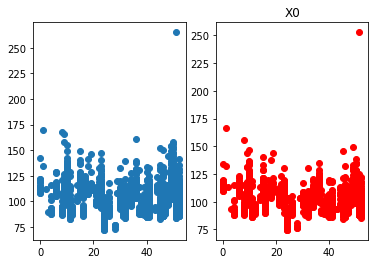

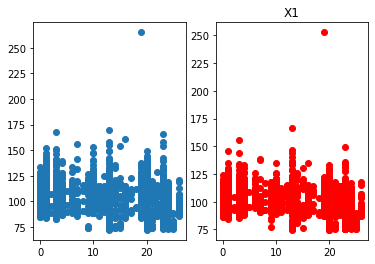

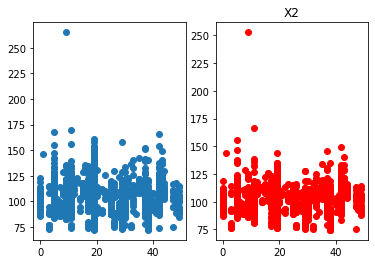

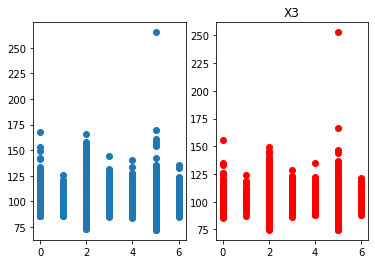

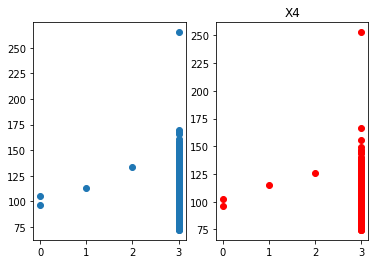

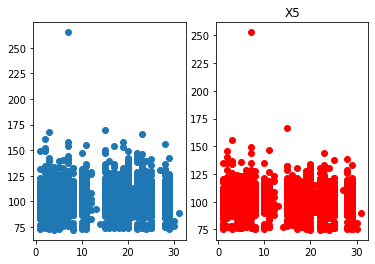

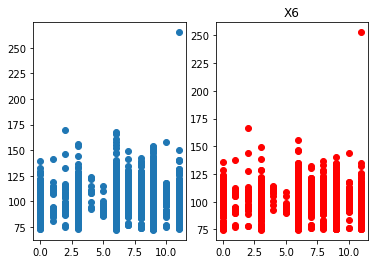

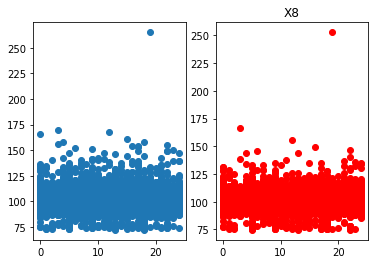

In [234]:
for i in ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']:
    fig,ax=plt.subplots(1,2)
    ax[0].scatter(train_data[i],train_data.y.values)
    ax[1].scatter(train_data[i],train_data_prediction,c='red')
    plt.title(i,loc='center')
    plt.show()

In [243]:
# test_data_prediction
test_data_prediction=model.predict(test_data_transformed)
test_data_prediction

array([ 75.91253 ,  91.40577 ,  86.76911 , ..., 102.24431 , 104.366135,
        84.184845], dtype=float32)

In [249]:
for target in test_data_prediction:
    print(target,end=' , ')

75.91253 , 91.40577 , 86.76911 , 74.962814 , 107.93848 , 93.41304 , 90.72118 , 96.077545 , 115.9718 , 89.76969 , 116.90074 , 105.099625 , 98.33863 , 97.26022 , 108.231674 , 116.05633 , 117.76024 , 98.33863 , 96.40237 , 103.76198 , 98.33863 , 98.33863 , 98.081566 , 97.811264 , 93.14013 , 114.09534 , 100.383156 , 104.46419 , 95.767586 , 96.5116 , 115.52521 , 103.6366 , 106.93517 , 98.15124 , 103.84414 , 111.37695 , 91.28922 , 103.961914 , 97.930145 , 97.83845 , 104.07816 , 98.89325 , 105.436 , 107.81124 , 112.01143 , 93.12476 , 103.961914 , 94.65653 , 105.372604 , 110.898476 , 97.811264 , 114.83867 , 93.822754 , 95.4591 , 115.724945 , 97.68365 , 104.66666 , 97.4476 , 109.64185 , 96.086044 , 103.03675 , 114.83867 , 94.04221 , 113.796745 , 101.29357 , 104.67376 , 110.928505 , 98.737 , 100.95292 , 114.83867 , 96.224365 , 109.47986 , 99.5064 , 103.50293 , 100.24479 , 95.733925 , 108.53506 , 96.58492 , 95.89205 , 97.50711 , 112.726204 , 110.107635 , 95.0621 , 98.97003 , 92.535225 , 110.490814